# Import library

In [18]:
import numpy as np
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import sklearn.decomposition as decomposition
import sklearn.model_selection as model_select
import sklearn.tree as tree
import sklearn.metrics as metrics


# Check data
Load data set and familiarise with the content of the data set

In [3]:
DEBUGGING = True


###### MAIN ######

# -load iris data set
iris = datasets.load_iris()
X = iris.data
y = iris.target
M = X.shape[0]  # number of instances in the data set
N = X.shape[1]  # number of features in the data set
if (DEBUGGING):
    print('shape of target=', np.shape(y))
    print('shape of attributes=', np.shape(X))
    print('mean of attributes=')
    for i in range(N):
        print(iris.feature_names[i], np.mean(X[i]))


shape of target= (150,)
shape of attributes= (150, 4)
mean of attributes=
sepal length (cm) 2.55
sepal width (cm) 2.375
petal length (cm) 2.35
petal width (cm) 2.3499999999999996


In [5]:
# -get a list of the unique classes in the data set
the_classes = np.unique(y)
num_classes = len(the_classes)
if (DEBUGGING):
    print('unique list of classes=', the_classes)


unique list of classes= [0 1 2]


In [7]:

#-for plotting, get a "property cycle" (like a dictionary) of colors
colour_cycle = plt.rcParams['axes.prop_cycle']

In [8]:
colour_cycle

'#1f77b4'
'#ff7f0e'
'#2ca02c'
'#d62728'
'#9467bd'
'#8c564b'
'#e377c2'
'#7f7f7f'
'#bcbd22'
'#17becf'


# Scatter plot

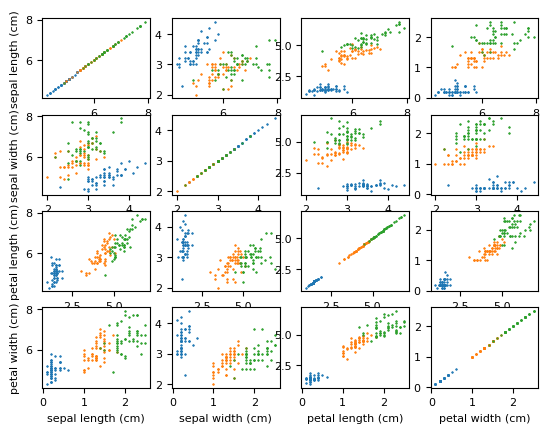

In [11]:
# -generate a scatter plot matrix of pairwise feature comparisons
plotnum = 1
for row in range(N):
    for col in range(N):
        plt.subplot(N, N, plotnum)
        for myclass, mycolour in zip(range(num_classes), colour_cycle):
            data = X[y == myclass]
            plt.scatter(data[:, row], data[:, col], s=1,
                        marker='.', c=mycolour['color'])
            if (col == 0):
                plt.ylabel(iris.feature_names[row], fontsize=8)
            if (row == N-1):
                plt.xlabel(iris.feature_names[col], fontsize=8)
            plt.tick_params(axis='both', labelsize=8)
        plotnum += 1
plt.savefig('plots/iris-scatter-matrix.png')
plt.show()


Each class is labeled in a different colour (red, blue or green). The plots clearly show that some of the feature comparisons clearly delineate the data (e.g., row 1, column 3), while others do a poorer job (e.g., row1, column 2). You are probably most used to seeing the \row 1, column 3" type of plot, because when the Iris data set is used to illustrate examples, all the data isn’t typically shown. This can be misleading, in addition to the fact that the Iris data set is a very neat and tractable data set|unlike most of the real-world data one encounters as a data scientist.

# PCA from sklearn decomposition

In [13]:
# -initialise principal component analysis object
# here, we set the n_components argument to be equal to the number of
# features-1, so we can look at the impact of each possible reduction
# using PCA (i.e., to 1, 2, ..., N-1 features).  but if you
# know how many principal components you want, then you can adjust
# this argument accordingly. for example, if you only want the first
# principal component, then set n_components=1.
# see:
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA
pca = decomposition.PCA(n_components=N-1)


In [14]:
# -fit the PCA model using data set X
pca.fit(X)


PCA(n_components=3)

In [15]:
# -apply dimensionality reduction to X
pca_X = pca.transform(X)
pca_N = pca_X.shape[1]


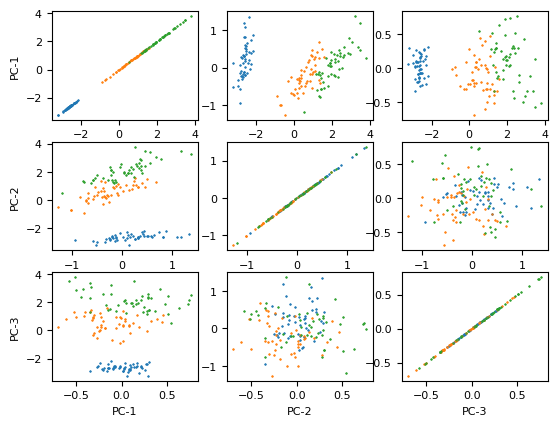

In [17]:
plotnum = 1
for row in range(pca_N):
    for col in range(pca_N):
        plt.subplot(pca_N, pca_N, plotnum)
        for myclass, mycolour in zip(range(num_classes), colour_cycle):
            data = pca_X[y == myclass]
            plt.scatter(data[:, row], data[:, col], s=1,
                        marker='.', c=mycolour['color'])
            if (col == 0):
                plt.ylabel('PC-%d' % (row+1), fontsize=8)
            if (row == pca_N-1):
                plt.xlabel('PC-%d' % (col+1), fontsize=8)
            plt.tick_params(axis='both', labelsize=8)
        plotnum += 1
plt.savefig('plots/iris-pca-scatter-matrix.png')
plt.show()


# Decision Tree
## Compare with original data set with PCA

In [19]:

# -initialise a decision tree classifier
print('DECISION TREE ON RAW DATA:')
clf = tree.DecisionTreeClassifier(random_state=0)

# split the raw data into training and test sets
X_train, X_test, y_train, y_test = model_select.train_test_split(
    X, y, random_state=0)
M_train = len(X_train)
M_test = len(X_test)
if (DEBUGGING):
    print('number of training instances = ' + str(M_train))
    print('number of test instances = ' + str(M_test))

# fit the tree model to the training data
clf.fit(X_train, y_train)

# predict the labels for the training and test sets
y_hat = clf.predict(X_train)
print('training accuracy = ', metrics.accuracy_score(y_train, y_hat))
y_hat = clf.predict(X_test)
print('training accuracy = ', metrics.accuracy_score(y_test, y_hat))


DECISION TREE ON RAW DATA:
number of training instances = 112
number of test instances = 38
training accuracy =  1.0
training accuracy =  0.9736842105263158


In [20]:

# -initialise a decision tree classifier
print('DECISION TREE ON PCA DATA:')
clf = tree.DecisionTreeClassifier(random_state=0)

# split the PCA data into training and test sets
X_train, X_test, y_train, y_test = model_select.train_test_split(
    pca_X, y, random_state=0)
M_train = len(X_train)
M_test = len(X_test)
if (DEBUGGING):
    print('number of training instances = ' + str(M_train))
    print('number of test instances = ' + str(M_test))

# fit the tree model to the training data
clf.fit(X_train, y_train)

# predict the labels for the training and test sets
y_hat = clf.predict(X_train)
print('training accuracy = ', metrics.accuracy_score(y_train, y_hat))
y_hat = clf.predict(X_test)
print('training accuracy = ', metrics.accuracy_score(y_test, y_hat))


DECISION TREE ON PCA DATA:
number of training instances = 112
number of test instances = 38
training accuracy =  1.0
training accuracy =  0.9210526315789473


Didn't work, how said :(